# Business DNN Decision Maker

## Data Loading

In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows-2021/netflixData.csv


In [64]:
df_netflix = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows-2021/netflixData.csv")

## Data Exploration

In [65]:
df_netflix[:10]

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...",Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020"
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020"
7,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,When nerdy high schooler Dani finally attracts...,Fernando Lebrija,Comedies,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017.0,TV-14,99 min,5.1/10,Movie,"September 8, 2017"
8,8b34e0e9-7258-4e49-b799-2e7eddbd7e34,#Rucker50,This documentary celebrates the 50th anniversa...,Robert McCullough Jr.,"Documentaries, Sports Movies",NaN,United States,2016.0,TV-PG,56 min,5.1/10,Movie,"December 1, 2016"
9,6da2fc83-1546-4e9d-bf2e-9b472a059c18,#Selfie,"Two days before their final exams, three teen ...",Cristina Jacob,"Comedies, Dramas, International Movies","Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2014.0,TV-MA,125 min,5.8/10,Movie,"June 21, 2021"


In [66]:
df_netflix.groupby(by="Content Type").count()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Date Added
Content Type,,,,,,,,,,,,
Movie,3867,3867,3867,3721,3867,3595,3569,3867,3866,3867,3551,3866
TV Show,2100,2100,2100,182,2100,1842,1839,2097,2097,2097,1808,766


In [67]:
df_netflix.loc[lambda r : r["Content Type"] == "TV Show",:].groupby(by="Imdb Score").count()[:5]

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Content Type,Date Added
Imdb Score,,,,,,,,,,,,
2.0/10,1,1,1,0,1,1,1,1,1,1,1,0
2.2/10,1,1,1,0,1,1,1,1,1,1,1,0
2.3/10,1,1,1,0,1,1,1,1,1,1,1,0
2.9/10,1,1,1,0,1,1,1,1,1,1,1,0
3.2/10,1,1,1,0,1,1,1,1,1,1,1,1


## Data Transformation

In [68]:
def changeAppearance(x):
    value = str(x)[0:3]
    value = float(value)
    return value

In [69]:
df_netflix["imdb_score"] = df_netflix.apply(lambda x : changeAppearance(x["Imdb Score"]), axis=1)
df_netflix[:5]

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,imdb_score
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN,6.6
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020",6.2
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020",6.4
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN,6.6
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020",5.1


In [70]:
def classify(x):
    if x >= 8.0:
        return "Treasure"
    if x >= 6.5:
        return "Usable"
    else:
        return "Cancelable"

In [71]:
df_netflix["business_category"] = df_netflix.apply(lambda x : classify(x["imdb_score"]), axis=1)
df_netflix[:5]

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,imdb_score,business_category
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN,6.6,Usable
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020",6.2,Cancelable
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020",6.4,Cancelable
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN,6.6,Usable
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020",5.1,Cancelable


In [72]:
df_netflix.loc[lambda r : r["Content Type"] == "TV Show",:].groupby(by="business_category").count()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,imdb_score
business_category,,,,,,,,,,,,,,
Cancelable,672,672,672,66,672,572,456,669,669,669,380,672,172,380
Treasure,410,410,410,33,410,371,405,410,410,410,410,410,221,410
Usable,1018,1018,1018,83,1018,899,978,1018,1018,1018,1018,1018,373,1018


In [73]:
df_shows = df_netflix.loc[lambda r : r["Content Type"] == "TV Show",:]

## Data Cleaning

### Checking for null values

In [74]:
def check_missing_values(col):
    counter = 0
    for element in col:
        if element == True:
            counter += 1
    return counter
    

In [75]:
df_shows.isnull().apply(lambda x: check_missing_values(x))

Show Id                  0
Title                    0
Description              0
Director              1918
Genres                   0
Cast                   258
Production Country     261
Release Date             3
Rating                   3
Duration                 3
Imdb Score             292
Content Type             0
Date Added            1334
imdb_score             292
business_category        0
dtype: int64

In [76]:
df_shows.loc[lambda x: x['imdb_score'].isnull(),:][:5]

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,imdb_score,business_category
29,5b890519-263d-4406-a9e2-9dd1ed240a32,1994,Archival video and new interviews examine Mexi...,Diego Enrique Osorno,"Crime TV Shows, Docuseries, International TV S...",NaN,Mexico,2019.0,TV-MA,1 Season,NaN,TV Show,NaN,NaN,Cancelable
43,55cd42a2-7405-4576-be4b-1e48d8632c7f,28 Moons,When her fiancé acts strangely upon receiving ...,NaN,"International TV Shows, Korean TV Shows, Roman...","Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...",South Korea,2016.0,TV-PG,1 Season,NaN,TV Show,NaN,NaN,Cancelable
134,397f1819-7676-4698-99b4-da72d2d0054b,A Perfect Day For Arsenide,An eclectic group of people encounters zany si...,Sunny Lau,"Classic & Cult TV, Crime TV Shows, Internation...","Wilfred Lau, Hanna Chan, Terence Siufay, Chloe...",NaN,2019.0,TV-MA,1 Season,NaN,TV Show,NaN,NaN,Cancelable
212,4eec1059-0f20-4116-9038-c3df8bd7a73e,Afronta! Facing It!,This docuseries spotlights Afro-Brazilian thin...,Juliana Vicente,"Docuseries, International TV Shows","Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,2017.0,TV-PG,1 Season,NaN,TV Show,NaN,NaN,Cancelable
218,a67741bc-89a0-481a-a62e-1de5cdf25433,Against the Tide,A detective and a psychologist investigating a...,NaN,"Crime TV Shows, International TV Shows, TV Dramas","Christopher Lee, Rui En, Desmond Tan, Zheng Ge...",Singapore,2014.0,TV-14,1 Season,NaN,TV Show,NaN,NaN,Cancelable


In [77]:
df_shows = df_shows.dropna(subset=['imdb_score'])

In [78]:
df_shows.isnull().apply(lambda x: check_missing_values(x))

Show Id                  0
Title                    0
Description              0
Director              1662
Genres                   0
Cast                   209
Production Country      56
Release Date             0
Rating                   0
Duration                 0
Imdb Score               0
Content Type             0
Date Added            1075
imdb_score               0
business_category        0
dtype: int64

In [79]:
df_shows.groupby(by="business_category").count()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,imdb_score
business_category,,,,,,,,,,,,,,
Cancelable,380,380,380,30,380,329,369,380,380,380,380,380,139,380
Treasure,410,410,410,33,410,371,405,410,410,410,410,410,221,410
Usable,1018,1018,1018,83,1018,899,978,1018,1018,1018,1018,1018,373,1018


### Checking for duplicated values

In [80]:
def check_duplicated_values(x):
    return x.duplicated().sum()

In [81]:
df_shows.apply(lambda x: check_duplicated_values(x))

Show Id                  0
Title                    7
Description              3
Director              1664
Genres                1600
Cast                   224
Production Country    1643
Release Date          1775
Rating                1802
Duration              1794
Imdb Score            1742
Content Type          1807
Date Added            1357
imdb_score            1742
business_category     1805
dtype: int64

In [82]:
df_shows.loc[:,["Description","business_category"]].duplicated().sum()

3

In [83]:
df_shows = df_shows.drop_duplicates(subset=['Description'])

In [84]:
df_shows.apply(lambda x: check_duplicated_values(x))

Show Id                  0
Title                    4
Description              0
Director              1661
Genres                1597
Cast                   221
Production Country    1640
Release Date          1772
Rating                1799
Duration              1791
Imdb Score            1739
Content Type          1804
Date Added            1354
imdb_score            1739
business_category     1802
dtype: int64

In [85]:
df_shows.groupby(by="business_category").count()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,imdb_score
business_category,,,,,,,,,,,,,,
Cancelable,380,380,380,30,380,329,369,380,380,380,380,380,139,380
Treasure,409,409,409,33,409,370,404,409,409,409,409,409,220,409
Usable,1016,1016,1016,83,1016,897,976,1016,1016,1016,1016,1016,371,1016


## Data Preprocessing

We are going to create a list of tokens to be used in the DNN model. A term-document to be used as input into the model. Furthermore, we have 2 version to test one with stop words and another without them. Evaluation which approach get better accuracy. Version 1 will use the stop words. Version 2 will not use them.

### Balancing Dataset

In [86]:
#df_shows = df_shows.drop(df_shows.loc[lambda r : r["business_category"] == "Usable",:][:516].index)

In [87]:
df_shows.groupby(by="business_category").count()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,imdb_score
business_category,,,,,,,,,,,,,,
Cancelable,380,380,380,30,380,329,369,380,380,380,380,380,139,380
Treasure,409,409,409,33,409,370,404,409,409,409,409,409,220,409
Usable,1016,1016,1016,83,1016,897,976,1016,1016,1016,1016,1016,371,1016


### Tokenization

In [88]:
import spacy

npl = spacy.load('en_core_web_sm')
# to be used in the without stopwords version
all_stopwords = npl.Defaults.stop_words

In [89]:
def tokenize_stopwords(cell):
    npl_text = npl(cell)
    tokens = [token.text.lower() for token in npl_text if token.text.isalnum()]
    return tokens


def tokenize_without_stopwords(cell):
    npl_text = npl(cell)
    tokens = [token.text.lower() for token in npl_text if token.text.isalnum() and not token.text in all_stopwords]
    return tokens

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

term_doc_m_v1 = CountVectorizer(tokenizer=tokenize_stopwords,max_df=0.8,min_df=0.01,max_features=4000)
term_doc_m_v2 = CountVectorizer(tokenizer=tokenize_without_stopwords,max_df=0.8,min_df=0.01,max_features=4000)

In [91]:
term_doc_m_v1.fit(df_shows['Description'])
term_doc_m_v2.fit(df_shows['Description'])

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(max_df=0.8, max_features=4000, min_df=0.01,
                tokenizer=<function tokenize_without_stopwords at 0x7f3969e82cb0>)

In [92]:
df_x_v1 = term_doc_m_v1.transform(df_shows['Description'])
df_x_v2 = term_doc_m_v2.transform(df_shows['Description'])

In [93]:
print("Length: " + str(len(df_shows)))
print("Shape Version 1: " + str(df_x_v1.shape))
print("Shape Version 2: " + str(df_x_v2.shape))
print("Feature Names v1: " + str(len(term_doc_m_v1.get_feature_names())))
print("Feature Names v2: " + str(len(term_doc_m_v2.get_feature_names())))

Length: 1805
Shape Version 1: (1805, 265)
Shape Version 2: (1805, 177)
Feature Names v1: 265
Feature Names v2: 177


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Hot Encoding

In [94]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_shows['business_category'])
print('Labels: ', label_encoder.classes_)


def label_encode(labels):
    encoding = label_encoder.transform(labels)
    return tf.keras.utils.to_categorical(encoding,len(label_encoder.classes_))


def label_decode(labels):
    decoding = np.argmax(labels, axis=1)
    return label_encoder.inverse_transform(decoding)

Labels:  ['Cancelable' 'Treasure' 'Usable']


In [95]:
label_encode(['Cancelable','Treasure','Usable'])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [96]:
df_y = label_encode(df_shows['business_category'])

In [97]:
df_y[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### spliting the dataset in the train, validation and testing sets

 lets get our train, validation, and test sets

In [98]:
from sklearn.model_selection import train_test_split

#### version 1

In [99]:
df_x_train_v1, df_x_test_v1, df_y_train_v1, df_y_test_v1 = train_test_split(df_x_v1, df_y, test_size=0.20,
                                                                            random_state=42)
df_x_train_v1, df_x_valid_v1, df_y_train_v1, df_y_valid_v1 = train_test_split(df_x_train_v1, df_y_train_v1,
                                                                              test_size=0.30, random_state=42)

In [100]:
df_y_valid_v1[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

#### version 2

In [101]:
df_x_train_v2, df_x_test_v2, df_y_train_v2, df_y_test_v2 = train_test_split(df_x_v2, df_y, test_size=0.20,
                                                                            random_state=42)

df_x_train_v2, df_x_valid_v2, df_y_train_v2, df_y_valid_v2 = train_test_split(df_x_train_v2, df_y_train_v2,
                                                                              test_size=0.30, random_state=42)

In [102]:
df_y_valid_v2[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [103]:
counter = {"Cancelable":0, "Treasure":0, "Usable":0}

def categorize(x):
    if x[0] == 1:
        counter["Cancelable"] = counter["Cancelable"] + 1 
        return
    if x[1] == 1:
        counter["Treasure"] = counter["Treasure"] + 1 
        return
    if x[2] == 1:
        counter["Usable"] = counter["Usable"] + 1 
        return

In [104]:
counter = {"Cancelable":0, "Treasure":0, "Usable":0}
for i in df_y_train_v1:
    categorize(i)
    
counter  

{'Cancelable': 213, 'Treasure': 234, 'Usable': 563}

In [105]:
counter = {"Cancelable":0, "Treasure":0, "Usable":0}
for i in df_y_train_v2:
    categorize(i)
    
counter    

{'Cancelable': 213, 'Treasure': 234, 'Usable': 563}

In [106]:
counter = {"Cancelable":0, "Treasure":0, "Usable":0}
for i in df_y_valid_v1:
    categorize(i)
    
counter  

{'Cancelable': 96, 'Treasure': 95, 'Usable': 243}

In [107]:
counter = {"Cancelable":0, "Treasure":0, "Usable":0}
for i in df_y_valid_v2:
    categorize(i)
    
counter  

{'Cancelable': 96, 'Treasure': 95, 'Usable': 243}

## Modeling

In [108]:
regularizer = tf.keras.regularizers.l1_l2(0, 0.001)
classes_len = len(label_encoder.classes_)

### Creating Models

#### Version 1

In [109]:
input_shape_v1 = len(term_doc_m_v1.get_feature_names())

model_v1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape_v1,)),
    tf.keras.layers.Dense(200, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(classes_len, kernel_regularizer=regularizer),
    tf.keras.layers.Softmax()
])

model_v1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               53200     
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 153       
_________________________________________________________________
softmax_2 (Softmax)          (None, 3)                 0         
Total params: 103,603
Trainable params: 103,603
Non-trainable params: 0
_________________________________________________________________


#### Version 2

In [110]:
input_shape_v2 = len(term_doc_m_v2.get_feature_names())

model_v2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape_v2,)),
    tf.keras.layers.Dense(200, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(classes_len, kernel_regularizer=regularizer),
    tf.keras.layers.Softmax()
])

model_v2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               35600     
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 153       
_________________________________________________________________
softmax_3 (Softmax)          (None, 3)                 0         
Total params: 86,003
Trainable params: 86,003
Non-trainable params: 0
_________________________________________________________________


### Compiling Models

In [111]:
model_v1.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

model_v2.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

### Training Models

#### Hyperparameters

In [112]:
epoch = 30
batch = 50

#### Version 1

In [113]:
history1 = model_v1.fit(df_x_train_v1, df_y_train_v1, epochs=epoch, batch_size=batch, validation_data=(df_x_valid_v1,df_y_valid_v1))

Epoch 1/30


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_8/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_8/embedding_lookup_sparse/Reshape:0", shape=(None, 200), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_8/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


21/21 [==============================] - 1s 19ms/step - loss: 1.4857 - accuracy: 0.5337 - val_loss: 1.4418 - val_accuracy: 0.5599
Epoch 2/30
21/21 [==============================] - 0s 6ms/step - loss: 1.3658 - accuracy: 0.5574 - val_loss: 1.3996 - val_accuracy: 0.5599
Epoch 3/30
21/21 [==============================] - 0s 6ms/step - loss: 1.2773 - accuracy: 0.5604 - val_loss: 1.3458 - val_accuracy: 0.5599
Epoch 4/30
21/21 [==============================] - 0s 5ms/step - loss: 1.1682 - accuracy: 0.5941 - val_loss: 1.3487 - val_accuracy: 0.5553
Epoch 5/30
21/21 [==============================] - 0s 6ms/step - loss: 1.0343 - accuracy: 0.6812 - val_loss: 1.4035 - val_accuracy: 0.5207
Epoch 6/30
21/21 [==============================] - 0s 5ms/step - loss: 0.8635 - accuracy: 0.7881 - val_loss: 1.5471 - val_accuracy: 0.5161
Epoch 7/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.8733 - val_loss: 1.7626 - val_accuracy: 0.4931
Epoch 8/30
21/21 [============

#### Version 2

In [114]:
history2 = model_v2.fit(df_x_train_v2, df_y_train_v2, epochs=epoch, batch_size=batch, 
                        validation_data=(df_x_valid_v2,df_y_valid_v2))

Epoch 1/30


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 200), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


21/21 [==============================] - 1s 16ms/step - loss: 1.4610 - accuracy: 0.5297 - val_loss: 1.4191 - val_accuracy: 0.5599
Epoch 2/30
21/21 [==============================] - 0s 5ms/step - loss: 1.3627 - accuracy: 0.5574 - val_loss: 1.3520 - val_accuracy: 0.5599
Epoch 3/30
21/21 [==============================] - 0s 5ms/step - loss: 1.2695 - accuracy: 0.5574 - val_loss: 1.3037 - val_accuracy: 0.5599
Epoch 4/30
21/21 [==============================] - 0s 5ms/step - loss: 1.1818 - accuracy: 0.5653 - val_loss: 1.2897 - val_accuracy: 0.5530
Epoch 5/30
21/21 [==============================] - 0s 5ms/step - loss: 1.0821 - accuracy: 0.6208 - val_loss: 1.3136 - val_accuracy: 0.5323
Epoch 6/30
21/21 [==============================] - 0s 5ms/step - loss: 0.9691 - accuracy: 0.6970 - val_loss: 1.3940 - val_accuracy: 0.4977
Epoch 7/30
21/21 [==============================] - 0s 5ms/step - loss: 0.8392 - accuracy: 0.7703 - val_loss: 1.5311 - val_accuracy: 0.4862
Epoch 8/30
21/21 [============

### Visualization Training Results

In [115]:
import matplotlib.pyplot as plt

def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric])
        ax[idx].legend([metric, 'val_' + metric])

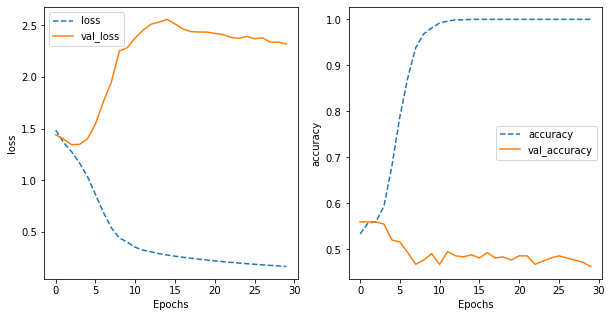

In [116]:
training_plot(['loss', 'accuracy'], history1)

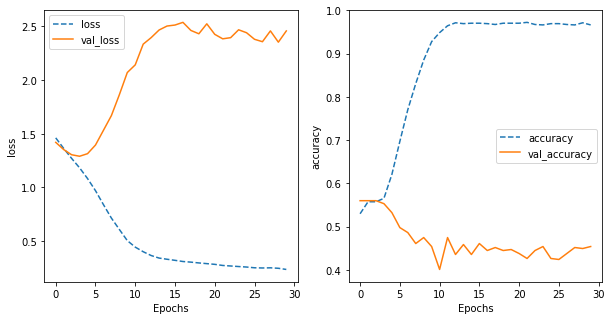

In [117]:
training_plot(['loss', 'accuracy'], history2)

### Predictions

In [118]:
## predict
df_y_test_v1_pred = model_v1.predict(df_x_test_v1)
df_y_test_v2_pred = model_v2.predict(df_x_test_v2)

### Visualization Predictions

In [119]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [120]:
# Funtion for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    classes.sort()
    tick_marks = np.arange(len(classes))    
    plt.figure(figsize=(4, 4),dpi=115)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Version 1

In [121]:
pred_result = label_decode(df_y_test_v1_pred)
true_result = label_decode(df_y_test_v1)
print(classification_report(y_true=true_result, y_pred=pred_result))

              precision    recall  f1-score   support

  Cancelable       0.26      0.20      0.23        71
    Treasure       0.19      0.19      0.19        80
      Usable       0.59      0.64      0.61       210

    accuracy                           0.45       361
   macro avg       0.35      0.34      0.34       361
weighted avg       0.44      0.45      0.44       361



Confusion matrix, without normalization


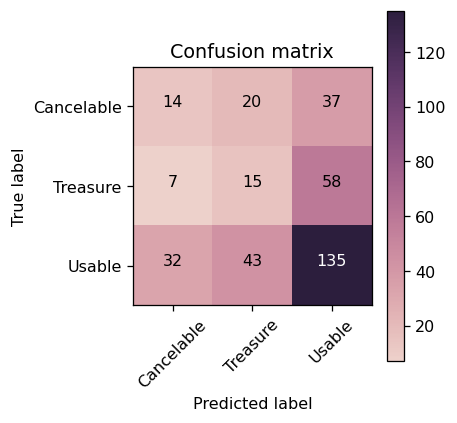

In [122]:
# plot confusion matrix
my_tags = ['Cancelable', 'Treasure', 'Usable']
cm = confusion_matrix(y_true=true_result, y_pred=pred_result) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### Version 2

In [123]:
pred_result = label_decode(df_y_test_v2_pred)
true_result = label_decode(df_y_test_v2)
print(classification_report(y_true=true_result, y_pred=pred_result))

              precision    recall  f1-score   support

  Cancelable       0.18      0.13      0.15        71
    Treasure       0.14      0.09      0.11        80
      Usable       0.58      0.71      0.64       210

    accuracy                           0.46       361
   macro avg       0.30      0.31      0.30       361
weighted avg       0.40      0.46      0.42       361



Confusion matrix, without normalization


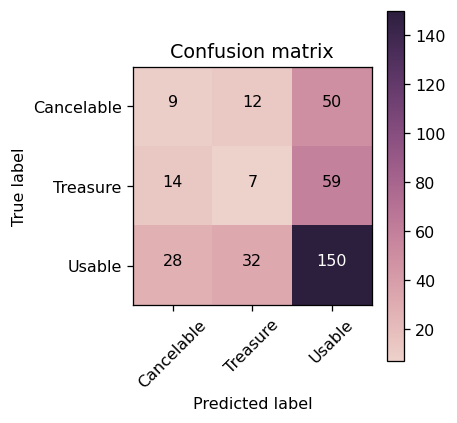

In [124]:
# plot confusion matrix
my_tags = ['Cancelable', 'Treasure', 'Usable']
cm = confusion_matrix(y_true=true_result, y_pred=pred_result) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Final Thoughts
In this case, a DNN wasn't the best solution because they need a bigger dataset for the training part. Furthermore, it is necesary a more balanced dataset. Even althought we used the full dataset in the creation of the term-document matrix.